## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных"        .
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

In [2]:
from pandas_datareader import data as pdr 
import matplotlib.pyplot as plt 

In [3]:
start = "2017-01-01" 
end = "2018-12-31" 
symbols = ["AAPL"] 
   
data = pdr.get_data_yahoo(symbols, start, end) 
   
data

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2017-01-03,27.174759,29.037500,29.082500,28.690001,28.950001,115127600.0
2017-01-04,27.144337,29.004999,29.127501,28.937500,28.962500,84472400.0
2017-01-05,27.282379,29.152500,29.215000,28.952499,28.980000,88774400.0
2017-01-06,27.586533,29.477501,29.540001,29.117500,29.195000,127007600.0
2017-01-09,27.839212,29.747499,29.857500,29.485001,29.487499,134247600.0
...,...,...,...,...,...,...
2018-12-24,35.429192,36.707500,37.887501,36.647499,37.037498,148676800.0
2018-12-26,37.924164,39.292500,39.307499,36.680000,37.075001,234330000.0


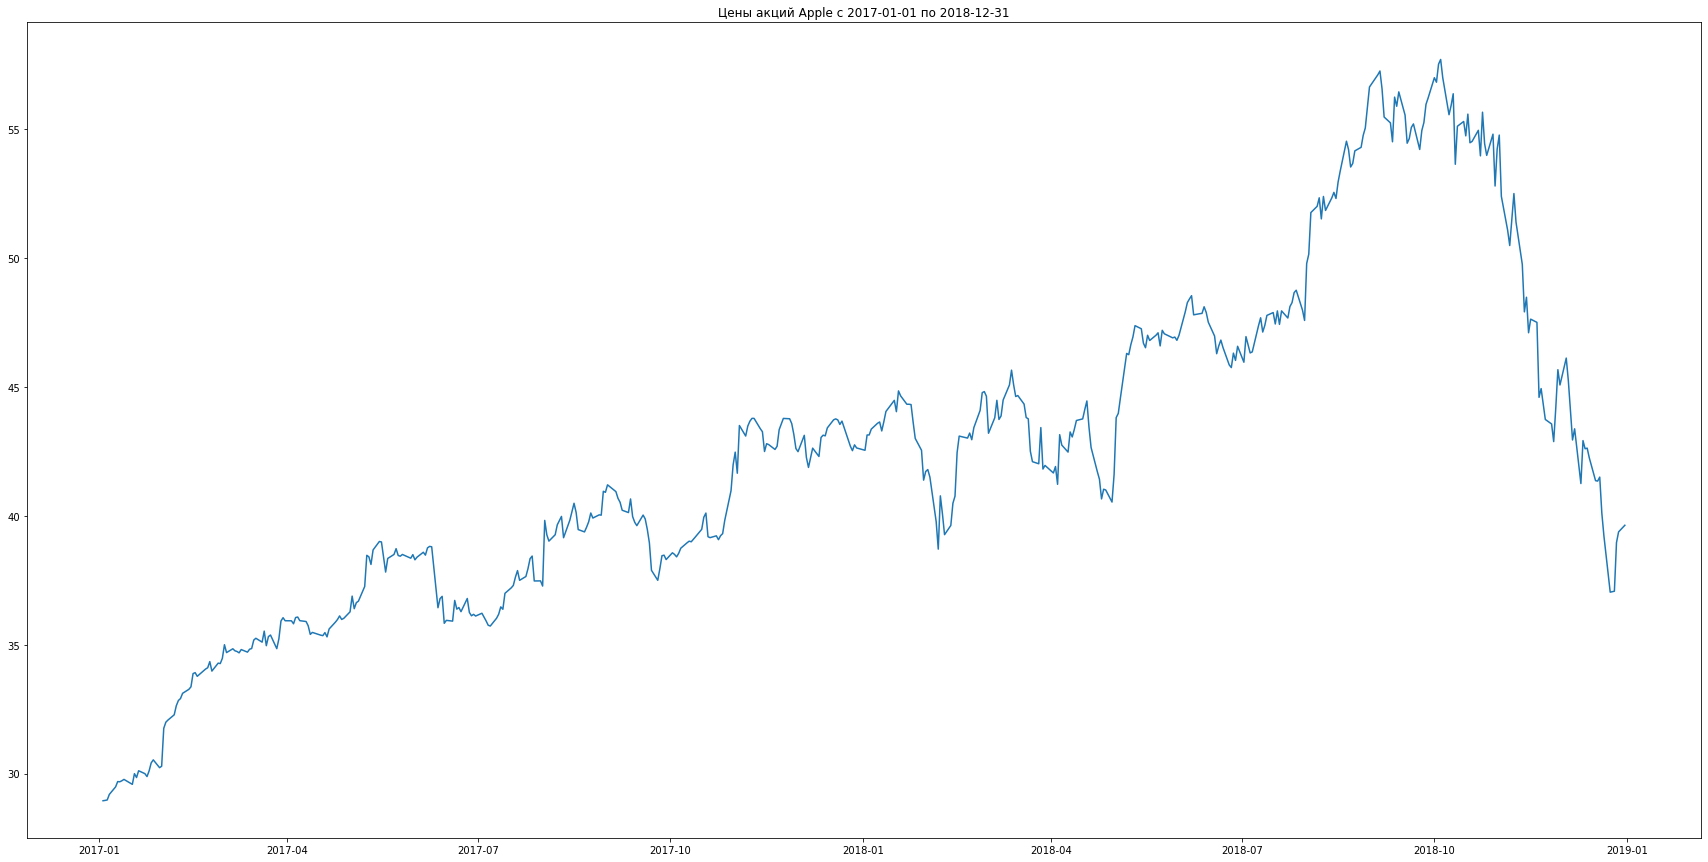

In [4]:
plt.figure(figsize = (30, 15)) 
plt.title(f'Цены акций Apple с {start} по {end}') 
plt.plot(data['Open']) 
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

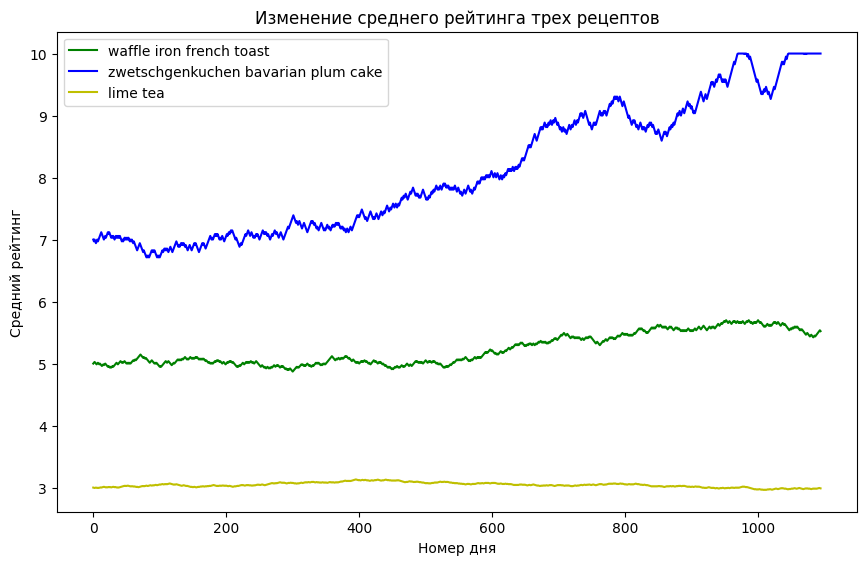

In [24]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("average_ratings.npy")
fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
y1_line, = ax.plot(range(0, len(data[0, :])), data[0, :], 'g', label = 'waffle iron french toast')
y2_line, = ax.plot(range(0, len(data[1, :])), data[1, :], 'b', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(range(0, len(data[2, :])), data[2, :], 'y', label = 'lime tea')
ax.set_ylabel('Средний рейтинг')
ax.set_xlabel('Номер дня')
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.legend(handles=[y1_line, y2_line, y3_line])


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


C:\Users\User\AppData\Local\Temp\ipykernel_8420\2356555287.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.date_range(start='1/1/2019', end='30/12/2021')


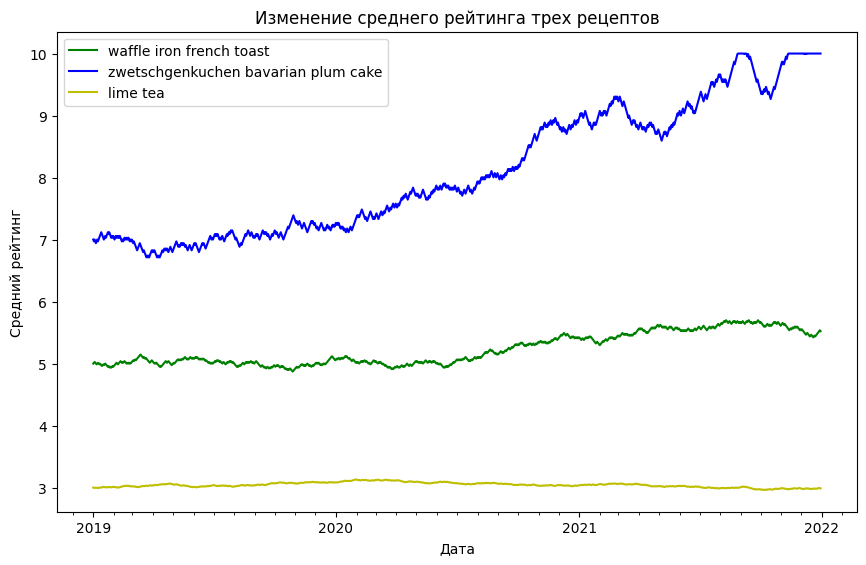

In [10]:
import pandas as pd
import matplotlib.dates as mdates

dates = pd.date_range(start='1/1/2019', end='30/12/2021')
fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
y1_line, = ax.plot(dates, data[0, :], 'g', label = 'waffle iron french toast')
y2_line, = ax.plot(dates, data[1, :], 'b', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(dates, data[2, :], 'y', label = 'lime tea')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_ylabel('Средний рейтинг')
ax.set_xlabel('Дата')
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.legend(handles=[y1_line, y2_line, y3_line])

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

Text(0.5, 0, 'Дата')

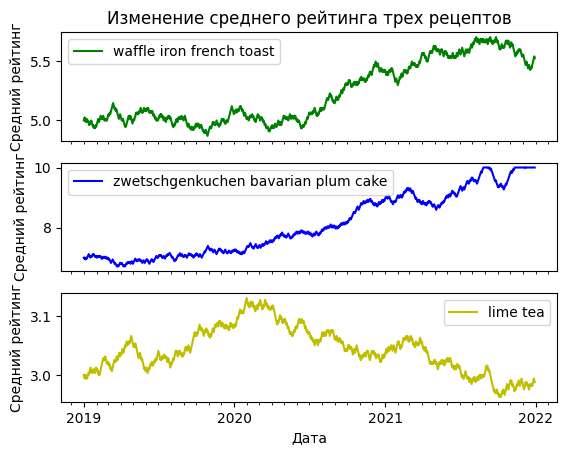

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1)


k = ["g", "b", "y"]
lab = ['waffle iron french toast','zwetschgenkuchen bavarian plum cake', 'lime tea']
axes[0].set_title("Изменение среднего рейтинга трех рецептов")
for i in range(len(axes)):
    axes[i].plot(dates, data[i, :], k[i], label = lab[i])
    axes[i].set_ylabel('Средний рейтинг')
    axes[i].xaxis.set_minor_locator(mdates.MonthLocator())
    axes[i].set_xticks([])
    axes[i].legend()
axes[i].xaxis.set_major_locator(mdates.YearLocator())
axes[i].set_xlabel('Дата')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 0, 'Количество дней с момента акции')

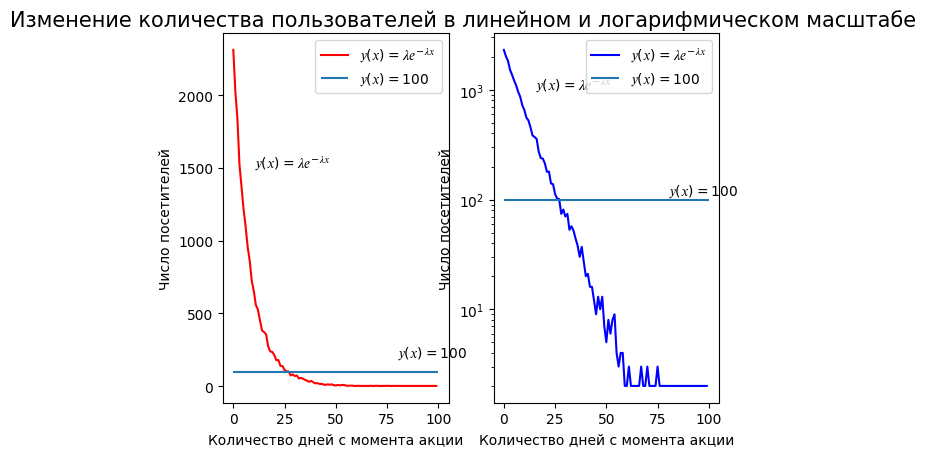

In [18]:
data2 = np.load("visitors.npy")
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе", y = 0.93, fontsize = 15)

ax0.plot(range(len(data2)), data2, 'r', label = "$𝑦(𝑥)=𝜆𝑒^{−𝜆𝑥}$")
ax0.annotate("$𝑦(𝑥)=𝜆𝑒^{−𝜆𝑥}$", xy=(10, 1500))
ax0.annotate("$𝑦(𝑥)=100$", xy=(80, 200))
ax0.hlines(100, 0, 100, label = "$𝑦(𝑥)=100$")
ax0.set_ylabel('Число посетителей')
ax0.set_xlabel('Количество дней с момента акции')
ax0.legend()

ax1.plot(range(len(data2)), data2, 'b', label = "$𝑦(𝑥)=𝜆𝑒^{−𝜆𝑥}$")
ax1.hlines(100, 0, 100, label = "$𝑦(𝑥)=100$")
ax1.annotate("$𝑦(𝑥)=𝜆𝑒^{−𝜆𝑥}$", xy=(15, 1000))
ax1.annotate("$𝑦(𝑥)=100$", xy=(80, 110))
ax1.set_yscale('log')
ax1.legend()
ax1.set_ylabel('Число посетителей')
ax1.set_xlabel('Количество дней с момента акции')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
reviews = pd.read_csv("reviews_sample.csv", index_col=0)
recipes = pd.read_csv("recipes_sample.csv", index_col=1)

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

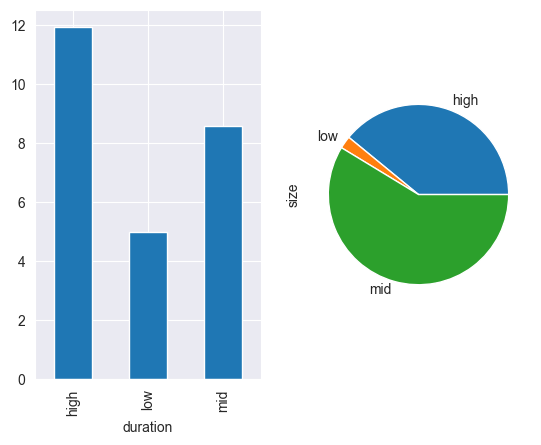

In [2]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
recipes["duration"] = recipes.minutes.aggregate(lambda m: "low" if m < 5 else "mid" if m < 50 else "high")
viz_data = recipes.groupby("duration").aggregate({"n_steps" : ["mean", "size"]})
viz_data.n_steps["mean"].plot(kind = "bar", ax = ax0)
viz_data.n_steps["size"].plot(kind = "pie", ax = ax1);

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

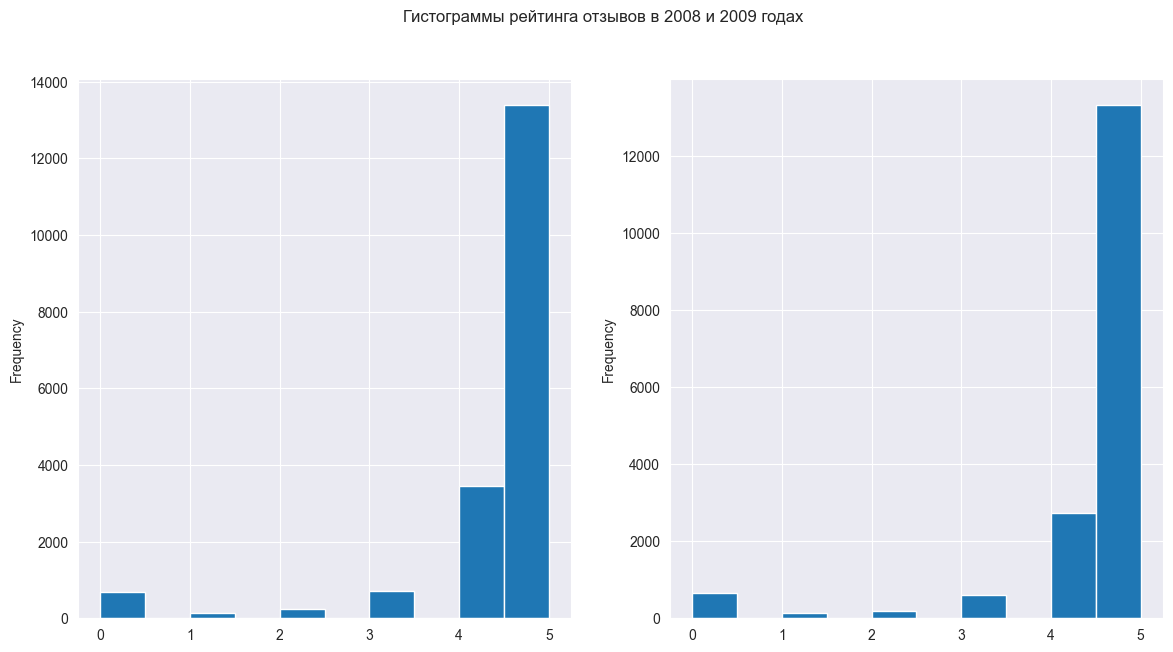

In [3]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах")
reviews["date"] = reviews["date"].astype("datetime64[ns]")
reviews[reviews["date"].dt.year == 2008]["rating"].plot(kind = "hist", ax= ax0)
reviews[reviews["date"].dt.year == 2009]["rating"].plot(kind = "hist", ax= ax1)
fig.set_figheight(7)
fig.set_figwidth(14)

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [4]:
# import seaborn as sns
# sns.scatterplot(recipes[["duration", "n_steps", "n_ingredients"]],z="duration", x="n_steps", y="n_ingredients", fill=True, cmap="inferno")
# fig = plt.figure()
# ax = fig.add_subplot(111, projection = "3d")
# rh = recipes[recipes.duration == "high"]
# ax.scatter(rh.n_steps, rh.n_ingredients, rh.n_steps )
# plt.show()

KeyError: "['duration'] not in index"

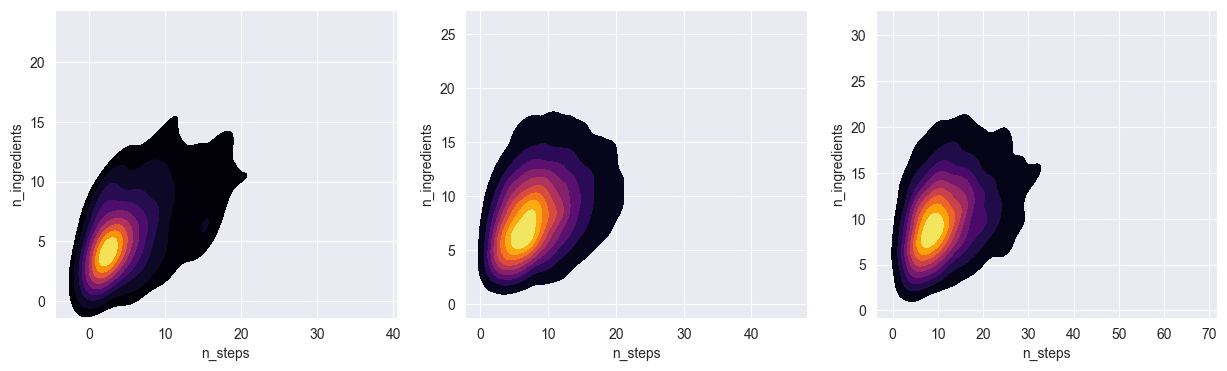

In [28]:
import seaborn as sns
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,4))
sns.kdeplot(recipes[["duration", "n_steps", "n_ingredients"]][recipes.duration == "high"], ax = ax3, x="n_steps", y="n_ingredients", fill=True, cmap="inferno")
sns.kdeplot(recipes[["duration", "n_steps", "n_ingredients"]][recipes.duration == "mid"], ax = ax2, x="n_steps", y="n_ingredients", fill=True, cmap="inferno")
sns.kdeplot(recipes[["duration", "n_steps", "n_ingredients"]][recipes.duration == "low"], ax = ax1, x="n_steps", y="n_ingredients", fill=True, cmap="inferno");

Корреляция либо отсутствует, либо наблюдается слабая возрастающая

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

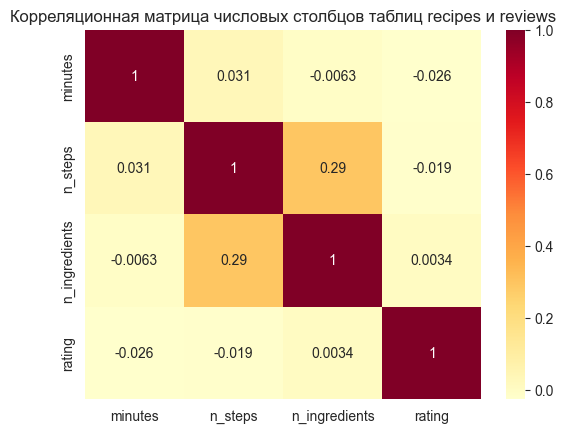

In [13]:
heatmap = sns.heatmap(reviews.join(recipes, on= 'recipe_id', how="inner")[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr(), annot = True, cmap="YlOrRd")
heatmap.set_title("Корреляционная матрица числовых столбцов таблиц recipes и reviews");